# YASA
This example script demonstrates how to use YASA to automatically detect sleep spindles.

Please make sure to install YASA first by following the procedure described at: https://github.com/raphaelvallat/yasa

In [1]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

import yasa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

## 1. Spindles detection
To illustrate the functions, we load 30 seconds of N2 sleep on a single
channel central EEG data. The sampling rate is 200 Hz.

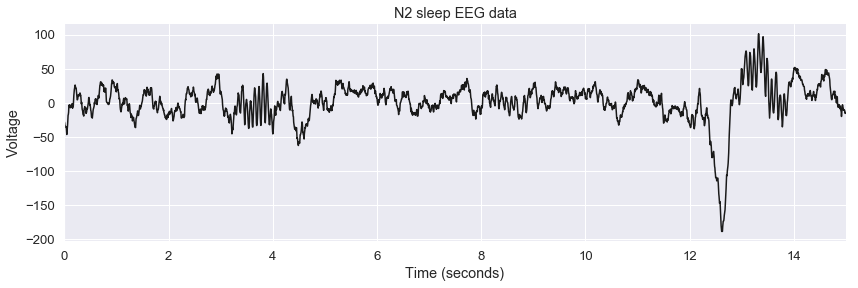

In [2]:
# Load data
data = np.loadtxt('data_N2_spindles_15sec_200Hz.txt')

# Define sampling frequency and time vector
sf = 200.
times = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
plt.plot(times, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([times.min(), times.max()])
plt.title('N2 sleep EEG data')
sns.despine()

We can clearly see that there are two clean spindles on this 15-seconds epoch. The first one starting at around 3.5 seconds and the second one starting around 13 seconds.

Let's detect these spindles using yasa:

In [3]:
sp = yasa.spindles_detect(data, sf)
sp

,Start,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Confidence
0,3.37,4.00,0.63,82.144897,20.560622,2.428862,0.527891,12.724772,8.0,0.687500,high
2,13.17,13.82,0.65,102.210795,25.404009,2.579672,0.212348,12.128554,7.0,0.363636,medium


The algorithm successfully identified the two spindles. The output of yasa `spindles_detect` function is a pandas DataFrame where each row is a spindle and each column a parameter of this spindle. The different parameters are described in the documentation:

In [4]:
yasa.spindles_detect?

Signature: yasa.spindles_detect(data, sf, freq_sp=(11, 16), duration=(0.3, 2.5), freq_broad=(0.5, 30), min_distance=500, thresh={'abs_pow': 1.25, 'rel_pow': 0.2, 'rms': 95, 'corr': 0.69})
Docstring:
Spindles detection using a custom algorithm based on
Lacourse et al. 2018.

This script will be more precise if applied only on artefact-free
NREM epochs. However, it should also work relatively well with full-night
recordings.

Parameters
----------
data : array_like
    Single-channel data
sf : float
    Sampling frequency of the data in Hz.
freq_sp : tuple or list
    Spindles frequency range. Default is 11 to 16 Hz.
freq_broad : tuple or list
    Broad band frequency of interest.
    Default is 0.5 to 30 Hz.
min_distance : int
    If two spindles are closer than min_distance (in ms), they are merged
    into a single spindles. Default is 500 ms.
thresh : dict
    Detection thresholds::

        'abs_pow' : Absolute log10(power) of the sigma-filtered signal.
        'rel_pow' : Relative 

### 1.1 Plot an overlay of our detected spindles
First we need to create a boolean array of the same size of data indicating for each sample if this sample is part of a spindles or not. This is done using the `get_bool_vector` function.

In [5]:
# Let's get a bool vector indicating for each sample
bool_spindles = yasa.get_bool_vector(data, sf, sp)

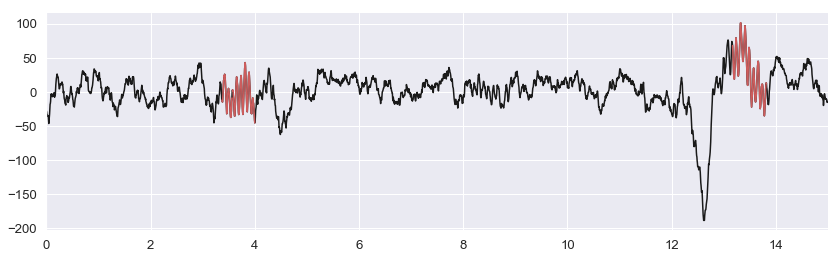

In [6]:
# Now let's plot
spindles_highlight = data * bool_spindles
spindles_highlight[spindles_highlight == 0] = np.nan

plt.figure(figsize=(14, 4))
plt.plot(times, data, 'k')
plt.plot(times, spindles_highlight, 'indianred')
plt.xlim(0, times.max())
sns.despine()

## 2. Behind the black box: the YASA algorithm step-by-step